In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from ultralytics import YOLO
import os
import boto3

In [3]:
BASE_MODEL_PATH = "models/new-yolo11x0.pt"
NEW_MODEL_PATH = "models/new-yolo11x5.pt"

AWS_ACCESS_KEY_ID = os.environ.get("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.environ.get("AWS_SECRET_ACCESS_KEY")
AWS_S3_BUCKET = os.environ.get("AWS_S3_BUCKET")
AWS_S3_ENDPOINT = os.environ.get("AWS_S3_ENDPOINT")

In [4]:
session = boto3.Session(
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)
client = session.client("s3", endpoint_url=AWS_S3_ENDPOINT)

In [5]:
client.download_file(AWS_S3_BUCKET, BASE_MODEL_PATH, "/tmp/base-model.pt")
client.download_file(AWS_S3_BUCKET, NEW_MODEL_PATH, "/tmp/new-model.pt")

In [6]:
model = YOLO("/tmp/base-model.pt")
results = model.val(data = "utils/dataset.yaml")

Ultralytics 8.3.146 🚀 Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA RTX A2000 12GB, 12032MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5755.4±1256.0 MB/s, size: 385.6 KB)


val: Scanning /opt/app-root/src/ai-demo/dataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]


                   all          5          8     0.0519       0.25      0.088      0.059
                  Ball          4          4      0.104        0.5      0.162      0.112
                  Hoop          4          4          0          0     0.0137    0.00555
Speed: 0.1ms preprocess, 25.6ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to runs/detect/val



Found https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg locally at 2164077239.0.jpg
image 1/1 /opt/app-root/src/ai-demo/2164077239.0.jpg: 448x640 1 Hoop, 61.8ms
Speed: 1.0ms preprocess, 61.8ms inference, 5.1ms postprocess per image at shape (1, 3, 448, 640)


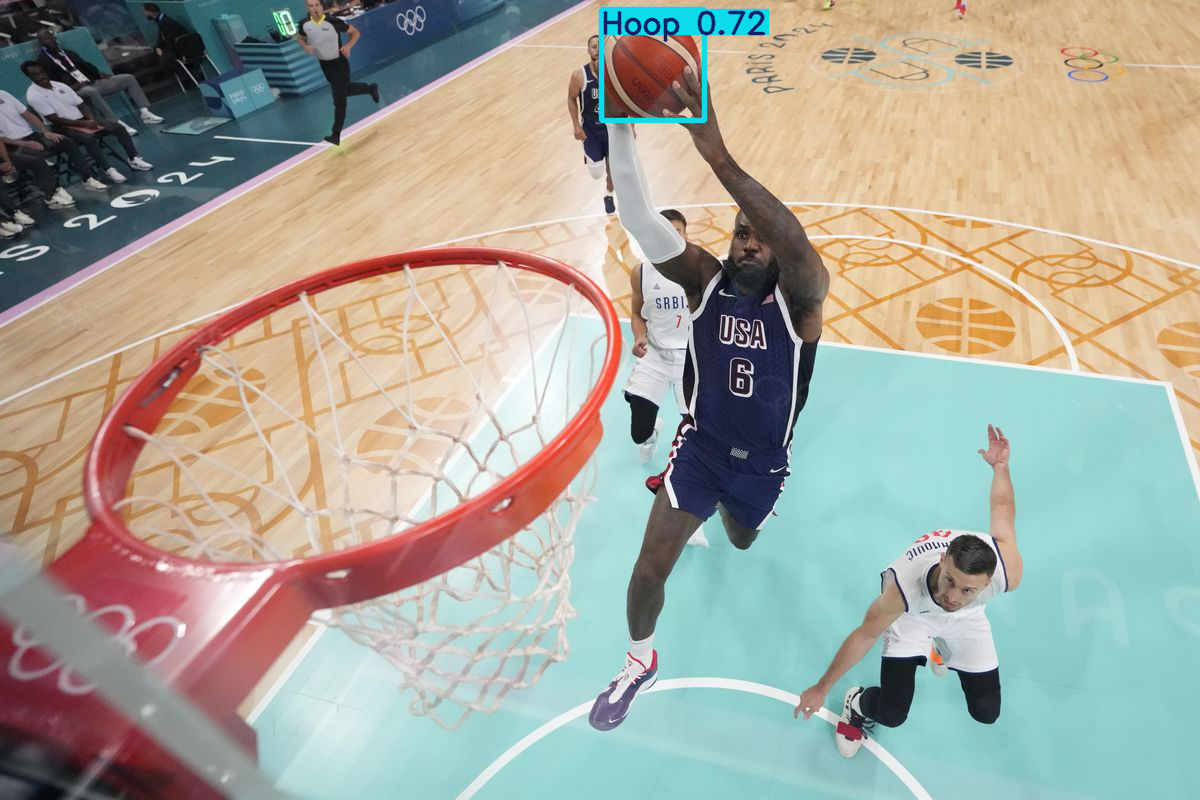

In [7]:
res = model("https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg")
res[0].show()

In [8]:
model = YOLO("/tmp/new-model.pt")
results = model.val(data = "utils/dataset.yaml")

Ultralytics 8.3.146 🚀 Python-3.11.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA RTX A2000 12GB, 12032MiB)
YOLO11x summary (fused): 190 layers, 56,829,334 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5572.0±1759.7 MB/s, size: 385.6 KB)


val: Scanning /opt/app-root/src/ai-demo/dataset/labels/val.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


                   all          5          8      0.854      0.618      0.658      0.527
                  Ball          4          4      0.709        0.5      0.554      0.432
                  Hoop          4          4          1      0.736      0.762      0.622
Speed: 0.1ms preprocess, 39.2ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val2



Found https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg locally at 2164077239.0.jpg
image 1/1 /opt/app-root/src/ai-demo/2164077239.0.jpg: 448x640 1 Ball, 29.0ms
Speed: 1.1ms preprocess, 29.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


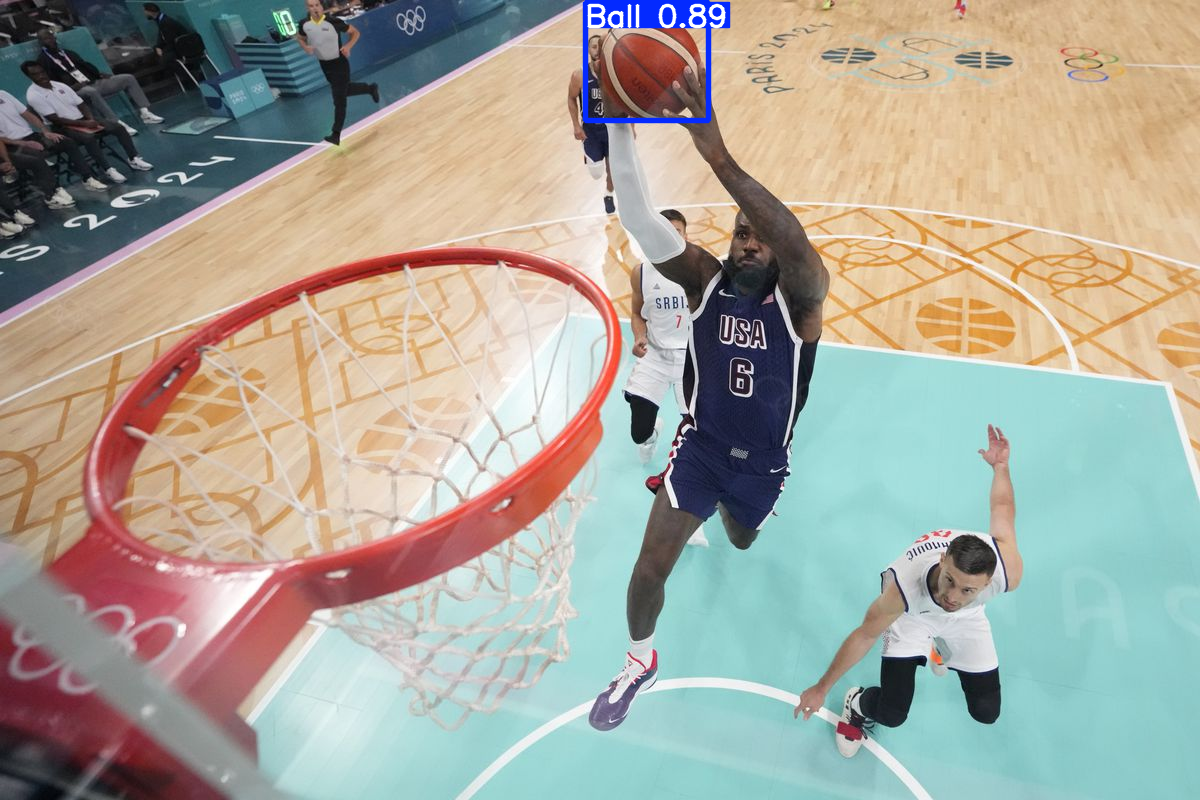

In [9]:
res = model("https://cdn.vox-cdn.com/thumbor/i68TkqWwk_6HTU2Hv67nVj96IM8=/0x0:6789x4526/1200x800/filters:focal(2900x20:3986x1106)/cdn.vox-cdn.com/uploads/chorus_image/image/73492755/2164077239.0.jpg")
res[0].show()